Una empresa que fabrica motocicletas tiene unas necesidades anuales del componente
principal que utiliza de D1 unidades, consumidas homogéneamente durante el
transcurso del año. Cada vez que realiza un pedido tiene un coste fijo de 700 u.m., y ha
estimado que la tasa anual de coste de mantenimiento de inventario es del 10% del valor
del producto. El proveedor ofrece un plan de descuentos uniformes según el volumen:

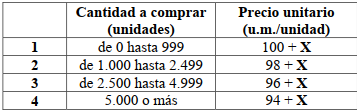

1. ¿Cuál es el tamaño del lote más adecuado y cuántos reaprovisionamientos realizará
a lo largo del año?
2. ¿Cuál es el tamaño del lote más apropiado si el fabricante de motocicletas logra
reducir su tasa de coste de mantenimiento de inventario a la mitad?
3. Manteniendo el coste de mantenimiento de la pregunta 1, ¿cuál sería el nuevo
tamaño de lote si la demanda anual de componentes fuera el doble de la actual?

Ahora se considera que la empresa dispone de una máquina con capacidad para procesar
anualmente, a ritmo constante y sin interrupción, 8.000 piezas; de las cuales se solicitan
en la línea, de manera homogénea a lo largo del tiempo, D2 unidades al año. Cada vez
que se lanza un lote de producción, se requiere un día de preparación de las máquinas y
se incurre en otros gastos que, en conjunto, se han valorado en 10 u.m. por cada
lanzamiento. La obtención de una pieza cuesta (40+X) u.m., y el coste de posesión del
inventario se contabiliza, en este caso, al 5% anual del valor del producto.



4. ¿Qué tamaño tendrá el lote de fabricación? ¿Cuánto tiempo tardará en obtenerse un
lote? ¿Cuántos lanzamientos anuales se realizarán? Considere 365 días/año.
5. Considerando la posibilidad de producción y consumo simultáneos y homogéneos
en el tiempo, determinar la expresión del coste anual óptimo, K*, en función de los
parámetros: CL, CS, D y P. Aplicar la fórmula con los datos disponibles.
6. ¿Qué solución propondría en caso de que el 5% de las piezas que produce el taller
de prensas fueran defectuosas?





In [13]:
import numpy as np
D1 = 10000 # cambiar
X = 5 # cambiar
i_1 = 0.1
C_L = 700
dic_tabla = {
    '1': [[0, 999], 100 + X],
    '2': [[1000, 2499], 98 + X],
    '3': [[2500, 4999], 96 + X],
    '4': [[5000, float('inf')], 94 + X]
}

def lote(dic_tabla, D1, C_L, i):
  lotes = {}
  preu_unitari = []
  for key, value in dic_tabla.items():
    lote =  np.sqrt(2*D1*C_L/(value[1]*i))
    preu_unitari.append(value[1])
    if value[0][0]<=lote<=value[0][1]:
      lotes[key] = round(lote)
    else:
      lotes[key] = value[0][1] if lote > value[0][1] else value[0][0]
  return lotes, preu_unitari

lotes_1 = lote(dic_tabla, D1, C_L, i_1)
print(f'1. Lotes encontrados; Q =  {lotes_1[0]}')

preu_unitari_1 = lotes_1[1]
def coste_anual_medio(lotes, C_L, D, preu_unitari, i):
  coste_anual = {}
  for key, value in lotes.items():
    index = int(key) - 1
    coste_anual[key] = C_L*D/value + preu_unitari[index]*D + i*preu_unitari[index]*value/2
  return coste_anual

costes_1 = coste_anual_medio(lotes_1[0], C_L, D1, preu_unitari_1, i_1)
print(f'   Costes anuales; K = {costes_1}')

def coste_min_reaprovi(costes, D, lotes):
    # Find the minimum cost
    coste_min = min(costes.values())

    # Find the corresponding key and value
    for key, value in costes.items():
        if value == coste_min:
            return key, value, D1/lotes[0][key], lotes[0][key]


coste_min_1 = coste_min_reaprovi(costes_1, D1, lotes_1)
print(f'    Lote más adecuado: {coste_min_1[3]}')
print(f'    valor min coste= {coste_min_1[:2]}')
print(f'    reprovisionamientos/año --> {coste_min_1[2]}')

i_2_cs = i_1/2
lotes_2_cs = lote(dic_tabla, D1, C_L, i_2_cs)
print(f'2. Lotes encontrados; Q =  {lotes_2_cs[0]}')
costes_2_cs = coste_anual_medio(lotes_2_cs[0], C_L, D1, preu_unitari_1, i_2_cs)
print(f'   Costes anuales; K = {costes_2_cs}')
coste_min_2_cs = coste_min_reaprovi(costes_2_cs, D1, lotes_2_cs)
print(f'    Lote más adecuado: {coste_min_2_cs[3]}')



D2 = 2*D1
lotes_2 = lote(dic_tabla, D2, C_L, i_1)
print(f'3. Lotes encontrados; Q =  {lotes_2[0]}')
preu_unitari_2 = lotes_2[1]
costes_2 = coste_anual_medio(lotes_2[0], C_L, D2, preu_unitari_2, i_1)
print(f'   Costes anuales; K = {costes_2}')
coste_min_2 = coste_min_reaprovi(costes_2, D2, lotes_2)
print(f'    Lote más adecuado: {coste_min_2[3]}')
print(f'    valor min coste= {coste_min_2[:2]}')
print(f'    reprovisionamientos/año --> {coste_min_2[2]}')

P = 8000
D_3_2 = 4000 # cambiar
TP = 1
CA_2 = 40 + X
C_L_2 = 10
i_2 = 0.05

def varios_productos(P, D, TP, CA, C_L, i):
  Q = round(np.sqrt(2*D*C_L/(i*CA*(1-D/P))))
  N_1 = np.sqrt(CA*i*D*(1-D/P)/(2*C_L))
  N_2 = (1-D/P)/(TP/365)
  N = D/Q
  T = Q*365/P
  return Q, N,T

Q_2 = varios_productos(P, D_3_2, TP, CA_2, C_L_2, i_2)
print(f'4. Q = {Q_2[0]} uds')
print(f'   N = {Q_2[1]} lanz/año')
print(f'   T = {Q_2[2]} dies')

def coste_EPQ(C_L, D, Q, CA, i):
  k = C_L*D/Q + CA*i*Q/2*(1-D/P)
  return k

COSTE_EPQ = coste_EPQ(C_L_2, D_3_2, Q_2[0], CA_2, i_2)
print(f'5. K(Q) = {COSTE_EPQ} um')

demanda_real = D_3_2/0.95
Q_real = np.sqrt(2*demanda_real*C_L_2/(i_2*CA_2*(1-demanda_real/P)))
print(f'6. Demanda real: {round(Q_real)}')

1. Lotes encontrados; Q =  {'1': 999, '2': 1166, '3': 2500, '4': 5000}
   Costes anuales; K = {'1': 1062251.757007007, '2': 1042008.3305317324, '3': 1025425.0, '4': 1016150.0}
    Lote más adecuado: 5000
    valor min coste= ('4', 1016150.0)
    reprovisionamientos/año --> 2.0
2. Lotes encontrados; Q =  {'1': 999, '2': 1649, '3': 2500, '4': 5000}
   Costes anuales; K = {'1': 1059629.382007007, '2': 1038491.1719678594, '3': 1019112.5, '4': 1003775.0}
    Lote más adecuado: 5000
3. Lotes encontrados; Q =  {'1': 999, '2': 1649, '3': 2500, '4': 5000}
   Costes anuales; K = {'1': 2119258.764014014, '2': 2076982.3439357188, '3': 2038225.0, '4': 2007550.0}
    Lote más adecuado: 5000
    valor min coste= ('4', 2007550.0)
    reprovisionamientos/año --> 2.0
4. Q = 267 uds
   N = 14.9812734082397 lanz/año
   T = 12.181875 dies
5. K(Q) = 300.000234082397 um
6. Demanda real: 281
